<a href="https://colab.research.google.com/github/0hanka07/MyFirstRepo/blob/main/NaiveBayesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TData = pd.read_csv('golf_df.csv', encoding= 'unicode_escape')
print(TData.shape)

(54, 5)


In [ ]:
TData.head(TData.shape[0])

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
TData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      38 non-null     object
 1   Temperature  38 non-null     object
 2   Humidity     38 non-null     object
 3   Windy        38 non-null     bool  
 4   Play         38 non-null     object
dtypes: bool(1), object(4)
memory usage: 1.3+ KB


In [ ]:
# Convert categorical values to numeric values
TData['Outlook'].replace(['sunny', 'overcast', 'rainy'],[0, 1, 2], inplace=True)
TData['Temperature'].replace(['hot', 'mild', 'cool'],[0, 1, 2], inplace=True)
TData['Humidity'].replace(['high', 'normal'],[0, 1], inplace=True)
TData['Windy'].replace(['TRUE', 'FALSE'],[0, 1], inplace=True)
TData['Play'].replace(['yes', 'no'],[0, 1], inplace=True)

In [ ]:
TData.head(TData.shape[0])

,Outlook,Temperature,Humidity,Windy,Play
0,0,0,0,False,1
1,0,0,0,True,1
2,1,0,0,False,0
3,2,1,0,False,0
4,2,2,1,False,0
5,2,2,1,True,1
6,1,2,1,True,0
7,0,1,0,False,1
8,0,2,1,False,0
9,2,1,1,False,0


In [ ]:
# Separating target column from X into y
X = TData.drop(['Play'],axis=1)
y = TData['Play']

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
display(X_train.head())
display(X_test.head())

,Outlook,Temperature,Humidity,Windy
36,2,2,1,False
0,0,0,0,False
19,2,2,1,False
32,0,0,0,False
24,1,0,1,False


,Outlook,Temperature,Humidity,Windy
7,0,1,0,False
1,0,0,0,True
23,1,1,0,True
13,2,1,0,True
3,2,1,0,False


In [ ]:
# LogisticRegression Model Implementation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
# Logistic Regression
from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()
gNB.fit(X_train, y_train)
Y_pred = gNB.predict(X_test)

gNB_train = round(gNB.score(X_train, y_train) * 100, 2)
gNB_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
f1_score = f1_score(y_test, Y_pred)
cnf_matrix = confusion_matrix(y_test, Y_pred)

print("Training Accuracy    :",gNB_train)
print("Model Accuracy Score :",gNB_accuracy)
print("Model F1 Score :",f1_score)
print(cnf_matrix)

Training Accuracy    : 83.33
Model Accuracy Score : 62.5
Model F1 Score : 0.6666666666666666
[[2 3]
 [0 3]]


Text(0.5, 427.9555555555555, 'Predicted label')

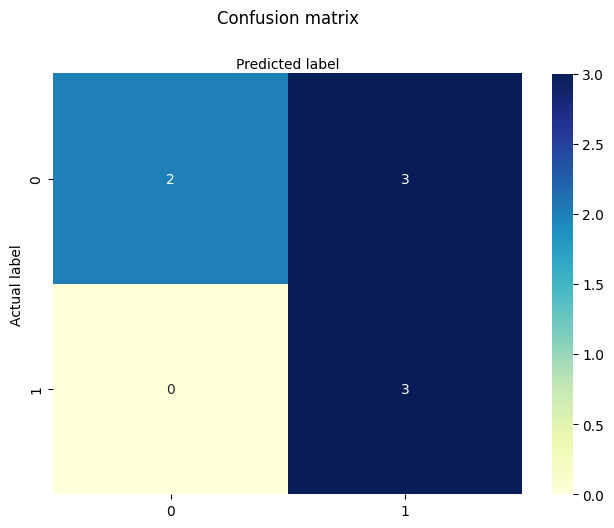

In [ ]:
# Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Visualizing 'ROC' curve
%matplotlib inline

y_scores = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

NameError: ignored